<a href="https://colab.research.google.com/github/Guhelo23/PA/blob/main/a8_aprendizado_maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

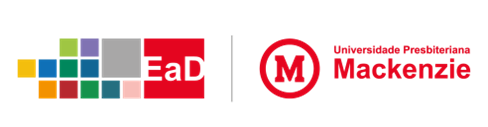

#<font color=blue> APRENDIZADO DE MAQUINA II

A8 - Aplicando Conhecimento

Liliane Gonçalves de Brito Ferraz - 10407087

A atividade desta aula consiste na aplicação dos conceitos das aulas anteriores na detecção de anomalia.
A atividade consiste em aplicar um ou mais dos algoritmos não supervisionado vistos no curso no problema de detecção
de falha em equipamento sendo monitorado por temporada.

In [ ]:
# Importando bibliotecas e pacotes a serem utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar a base de dados
dados = pd.read_csv("/content/drive/My Drive/art_noisy.csv", encoding="ISO-8859-1", sep=",")
dados.head(3)

,timestamp,value
0,2014-04-01 00:00:00,18.622185
1,2014-04-01 00:05:00,8.163417
2,2014-04-01 00:10:00,13.292383


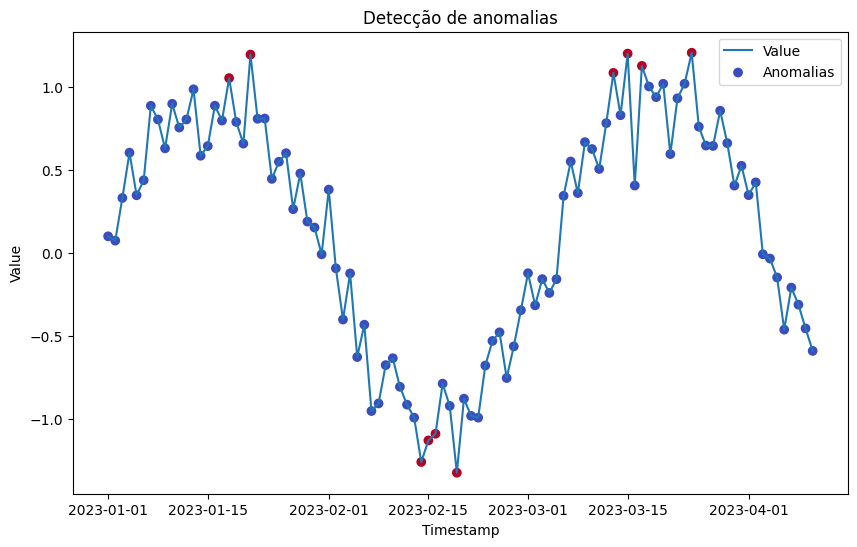

In [ ]:
# Criar dados fictícios
rng = np.random.RandomState(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.sin(np.linspace(0, 10, 100)) + rng.normal(0, 0.2, 100) # Seno com ruído

dados = pd.DataFrame({'Timestamp': dates, 'Value': values})

# Pré-processamento
dados['Timestamp'] = pd.to_datetime(dados['Timestamp'])
dados.set_index('Timestamp', inplace=True)

# Escalonar os dados
scaler = StandardScaler()
dados['Value_scaled'] = scaler.fit_transform(dados[['Value']])

# Aplicar Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
dados['anomaly'] = model.fit_predict(dados[['Value_scaled']])

# Identificar anomalias
dados['anomaly'] = dados['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.plot(dados.index, dados['Value'], label='Value')
plt.scatter(dados.index, dados['Value'], c=dados['anomaly'], cmap='coolwarm', label='Anomalias')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Detecção de anomalias')
plt.legend()
plt.show()